<a href="https://colab.research.google.com/github/mateosardi/TP1_COA/blob/main/Clase_03_Octave_Control_%C3%93ptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generación de señales PRBS y análisis de su autocorrelación y densidad espectral


In [ ]:
!apt-get update #Ejecutar cuando falle algún paquete.

In [ ]:
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super #No es mandatorio, sólo para imprimir en formato dvi, latex etc

In [ ]:
!apt install octave

In [ ]:
# !apt install octave-control #Ejecutar si se va a agregar pkg load control desde el script

Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave-control is already the newest version (3.0.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
# !apt install octave-statistics

In [28]:
%%writefile Tabla_18_1.m
%Tabla 2 1 del apunte de Control óptimo
%pkg load statistics
warning('off','all');
tic
%Generación de una señal PRBS 
clear; 
m=9; 
x=ones(m,1); 
N=2000;%Puntos de la PRBS para muestrear 
el=5; 
for k=1:el:N 
  n_b=xor(x(9),x(5)); 
  y(k:k+el-1)=x(9); 
  for h=m-1:-1:1 
    x(h+1)=x(h); 
  end 
    x(1)=n_b; %Ingreso el nuevo valor 
end 
  x=[]; 
  x=(2*y(1:N)-1); 
  %Cálculo de la correlación entre señales digitalizadas 
  At=1;N=length(x); 
  Tmax=N; 
  t=At:At:Tmax; 
  W=N/(2*Tmax); 
  fmax=W; 
  Af=2*fmax/N; 
  w1=Af:Af:fmax; 
  % frec=.1; 
  w=2*pi*Af; 
  %valor para tao=0: 
  fi(1)=x*x'/N; 
  for j=1:N-1 
    fi(j+1)=x(1:N-j)*x(1+j:N)'/(N-j); 
end 
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);plot(t,x,'.-k');
title("$Funci\\acute{o}n \ temporal\  PRBS\  7\  \Delta_t=1.$"); %xlabel('Tiempo [seg.]'); 
subplot(3,1,2); plot(t,fi(1:N));
%ylabel("$Autocorrelaci\\acute{o}n$"); %xlabel('Tiempo [seg.]'); 
%%Cálculo de la densidad de potencia espectral 
M1=100; %Intervalos de correlación útiles 
j=0:M1-1; 
argu=-i*pi*0*j/M1; 
Sx(1)=fi(1:M1)*exp(argu)'; 
for k=1:M1 
  argu=-i*2*pi*k*j/M1; 
  Sx(k+1)=fi(1:M1)*exp(argu)'; 
end 
Sx=Sx/M1; 
Af=2*fmax/M1;w0=Af:Af:fmax; 
subplot(3,1,3);plot(w0(1:M1/2),abs(Sx(1:M1/2)),'.k'); %ylabel('Densidad de potencia');xlabel('Frec. [Hz.]'); 
y=fft(x)/N; 
M2=N/2; 
hold on; 
subplot(3,1,3);plot(w1(1:M2),(abs(y(1:M2))).^2,'r'); %ylabel('Densidad de potencia FFT');xlabel('Frec. [Hz.]'); 
%legend('Sx de f_x_x','F(w) de x_k'); % print('Inte_SJ_fig_1', '-dpng', '-r600'); 
%title("$Distribuci\\acute{o}n\\ gamma$");
TCalculo=toc
save('Tabla_18_1.mat','-v7');
%figure(1) %La muestra si la corro en el programa
%De acá en adelante es para imprimir la figura con formato latex
print -depslatexstandalone hfig1;
## process generated files with pdflatex
system ("latex hfig1.tex");
## dvi to ps
system ("dvips hfig1.dvi");
## convert to png
system ("gs -dNOPAUSE -dBATCH -dSAFER -sDEVICE=png16m -dTextAlphaBits=4 -dGraphicsAlphaBits=4 -r300x300 -dEPSCrop -sOutputFile=Tabla_18_1.png hfig1.ps");

Overwriting Tabla_18_1.m


In [29]:
!octave -W Tabla_18_1.m  # -W : no window system
# from PIL import Image
# imt = Image.open("/content/Tabla_2_1.png")
# imt

TCalculo =  0.58136
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./hfig1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/minimal.cls
Document Class: minimal 2001/05/25 Standard LaTeX minimal class
) (/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo)
(/usr/share/texlive/texmf-dist/tex/latex/tools/calc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/dvips.def)))
(/usr/share/texlive/texmf-dist/tex/latex/graphics/color.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/u

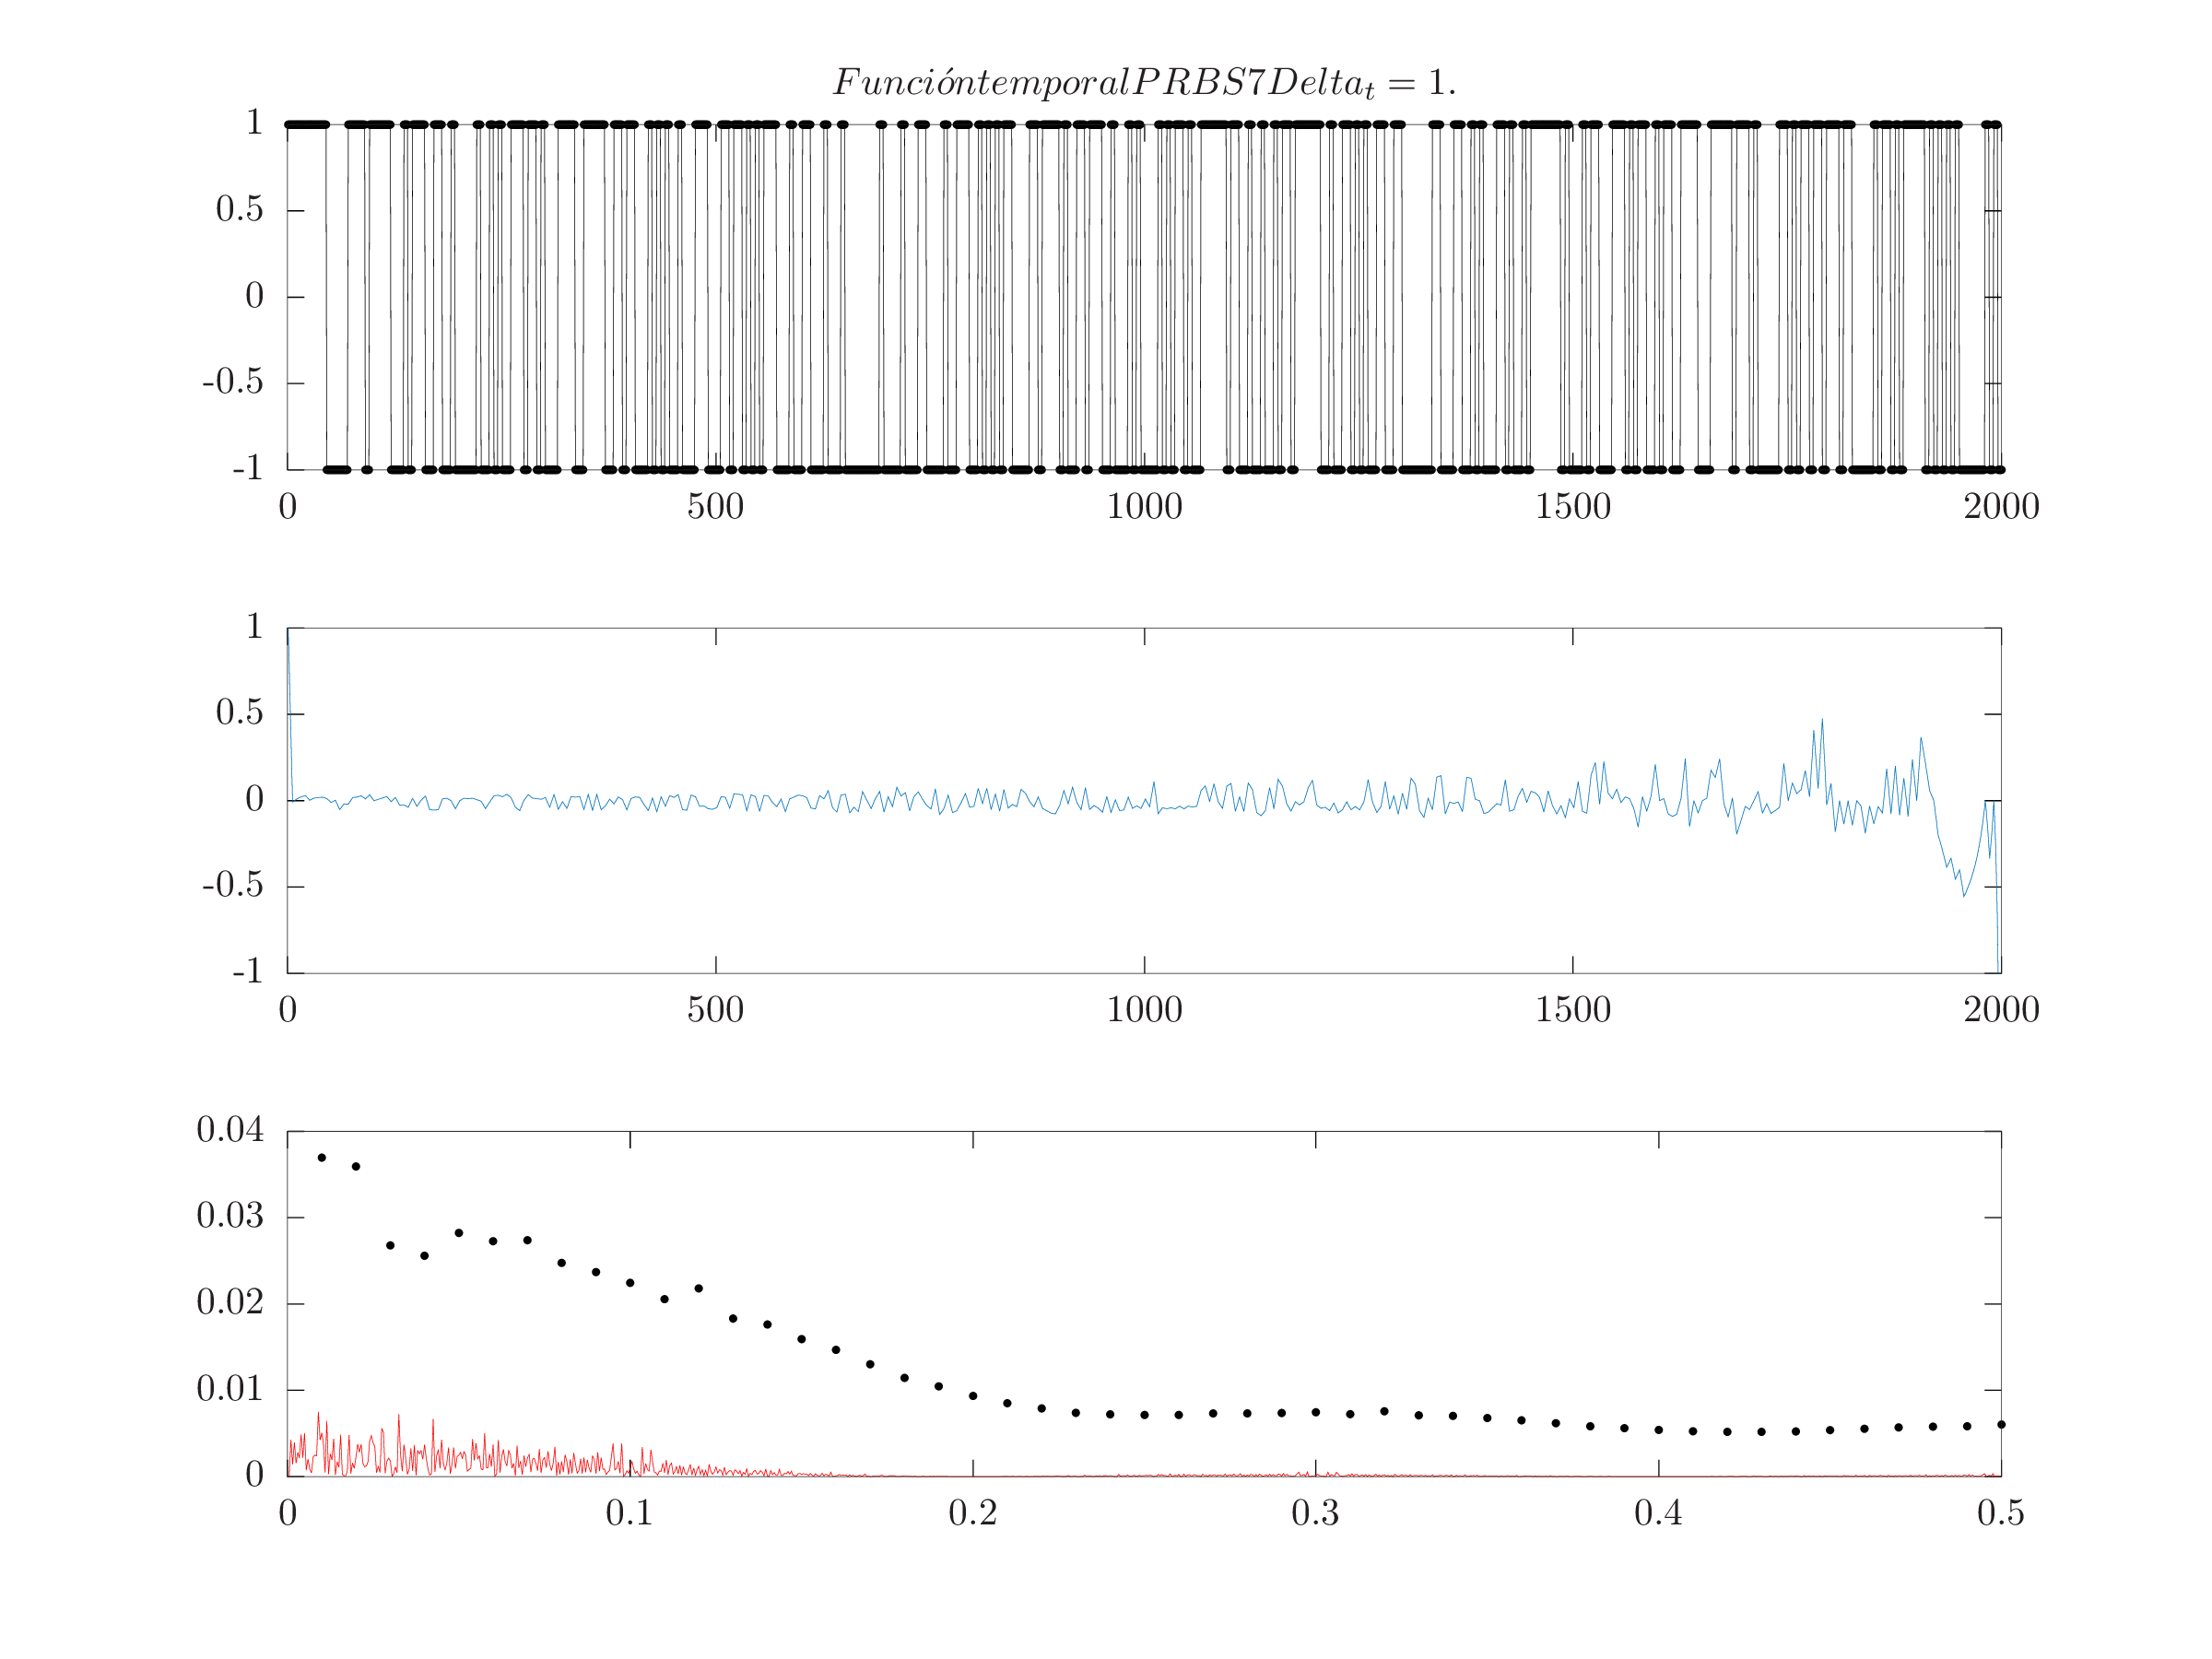

In [30]:
from PIL import Image
imt = Image.open("/content/Tabla_18_1.png")
imt